In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path, PurePath

if Path('../data').exists():
    data_directory = PurePath("../data")
    print(data_directory)
    
if Path('../visuals').exists():
    viz_directory = PurePath("../visuals")
    print(viz_directory)


..\data
..\visuals


In [22]:
checkout = pd.read_csv(f"{data_directory}/subquad_N26_seed43_threshquickrandom_13-Nov-2020.csv")
checkout["NumberOfElements"] = 2**checkout["2^N"]

In [23]:
checkout["Time/N (us)"] = ((checkout['Time']/checkout['NumberOfElements'])*1e6).to_numpy(dtype='float32')

In [41]:
start_row = 875 # 5 algos x 5 times x 5 lists x 7 drop to get start at 2^8 

<Figure size 720x2160 with 0 Axes>

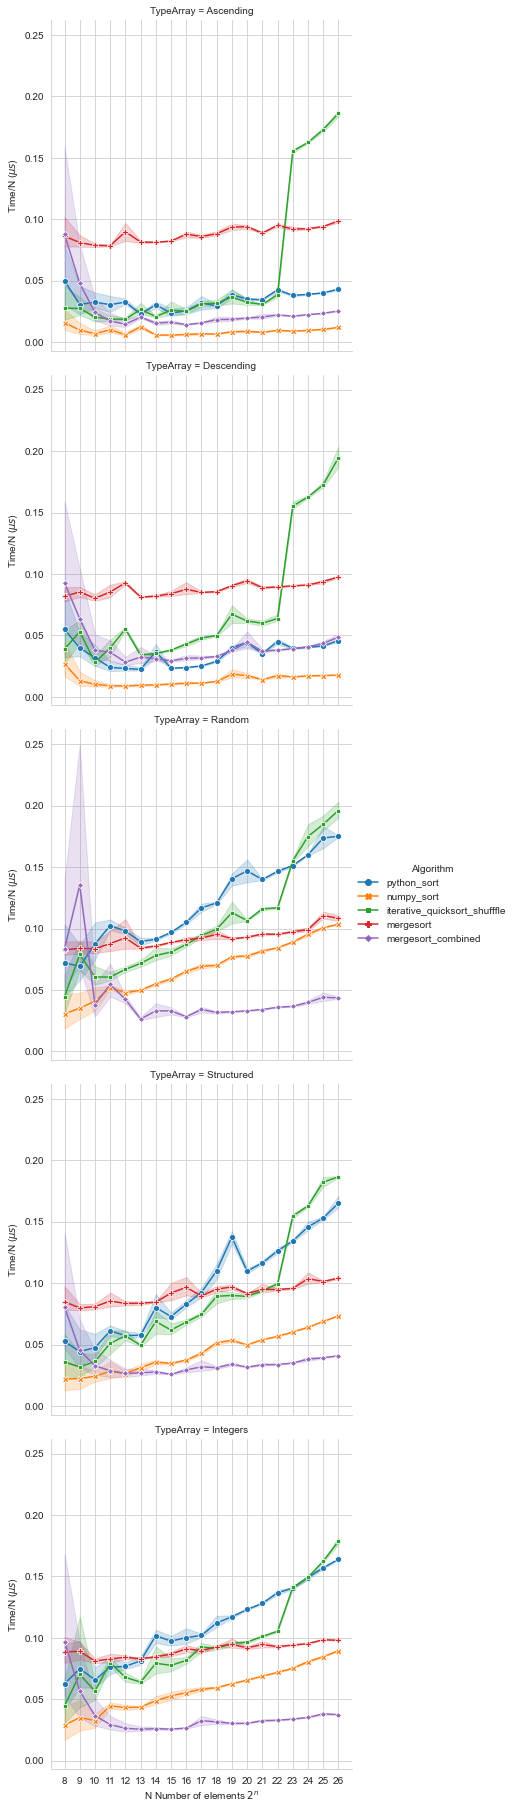

In [47]:
plt.figure(figsize=(10, 30))
sns.set_style("whitegrid")

time_per_n = sns.relplot(
    data=checkout.iloc[start_row:], x="2^N", y="Time/N (us)", row="TypeArray", hue="Algorithm", style="Algorithm", markers=True, dashes=False, kind="line"
)
time_per_n.set(yscale="linear", xscale="linear")
time_per_n.set(xlabel="N Number of elements $2^n$", ylabel="Time/N ($\mu s$)")
time_per_n.set(xticks=[int(i) for i in range(8, max(checkout['2^N'] + 1))])

plt.savefig(f"{viz_directory}/time_per_n.pdf", bbox_inches='tight', transparent=True)
plt.show()


<Figure size 720x2160 with 0 Axes>

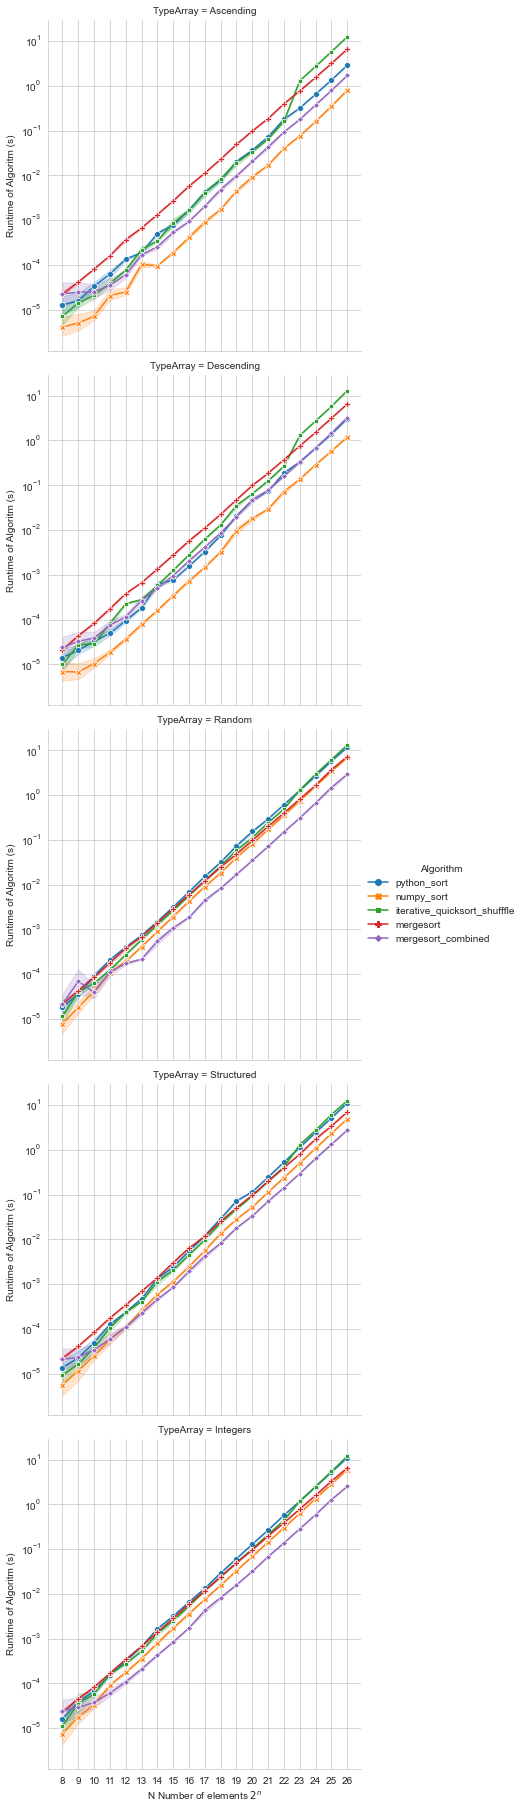

In [48]:
plt.figure(figsize=(10, 30))
sns.set_style("whitegrid")

runtime = sns.relplot(
    data=checkout.iloc[start_row:], x="2^N", y="Time", row="TypeArray", hue="Algorithm", style="Algorithm", markers=True, dashes=False, kind="line"
)
runtime.set(yscale="log")
runtime.set(xlabel="N Number of elements $2^n$", ylabel="Runtime of Algoritm (s)")
runtime.set(xticks=[int(i) for i in range(8, max(checkout['2^N'] + 1))])

plt.savefig(f"{viz_directory}/runtime.pdf", bbox_inches='tight', transparent=True)
plt.show()


In [49]:
checkout

,Unnamed: 0,Algorithm,2^N,TypeArray,Time,NumberOfElements,Time/N (us)
0,0,python_sort,1,Ascending,4.438657,2,2.219328e+06
1,1,python_sort,1,Ascending,0.000007,2,3.650000e+00
2,2,python_sort,1,Ascending,0.000003,2,1.750000e+00
3,3,python_sort,1,Ascending,0.000002,2,1.100000e+00
4,4,python_sort,1,Ascending,0.000002,2,1.200000e+00
...,...,...,...,...,...,...,...
3245,3245,mergesort_combined,26,Integers,2.521427,67108864,3.757219e-02
3246,3246,mergesort_combined,26,Integers,2.511030,67108864,3.741727e-02
3247,3247,mergesort_combined,26,Integers,2.518828,67108864,3.753346e-02
3248,3248,mergesort_combined,26,Integers,2.515250,67108864,3.748015e-02
